In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\91987\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df[df.duplicated(keep='first')==True]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [6]:
df.drop_duplicates(keep = "first", inplace = True)

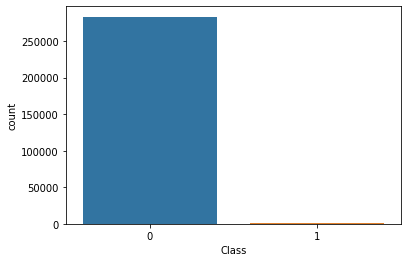

In [7]:
ax = sns.countplot(x="Class",data=df)

In [8]:
df["Class"].value_counts()

0    283253
1       473
Name: Class, dtype: int64

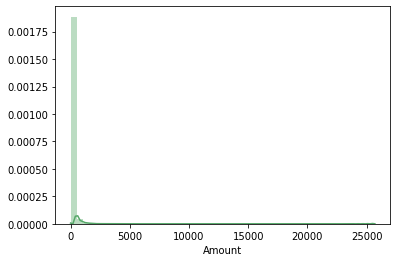

In [9]:
sns.set_color_codes()
ax = sns.distplot(df["Amount"], color="g")

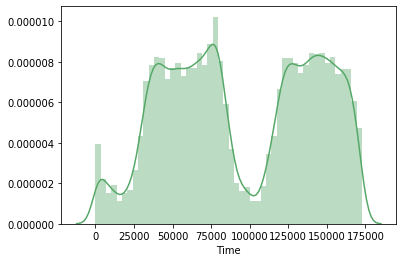

In [10]:
sns.set_color_codes()
ax = sns.distplot(df["Time"], color="g")

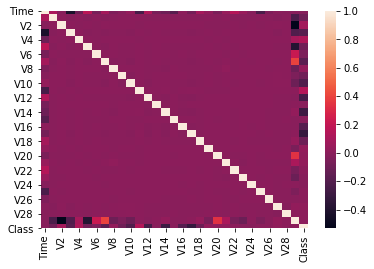

In [11]:
sns.heatmap(df.corr())

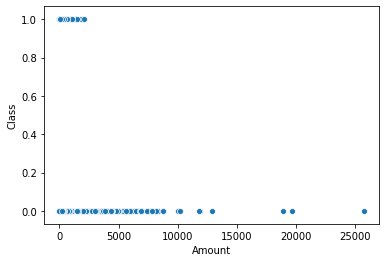

In [12]:
sns.scatterplot(x="Amount",y="Class",data=df)

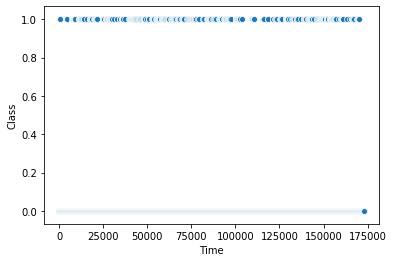

In [13]:
sns.scatterplot(x="Time",y="Class",data=df)

No handles with labels found to put in legend.


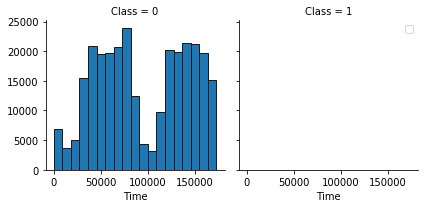

In [14]:
bins = np.linspace(df.Time.min(), df.Time.max(), 20)
g = sns.FacetGrid(df, col="Class", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Time', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

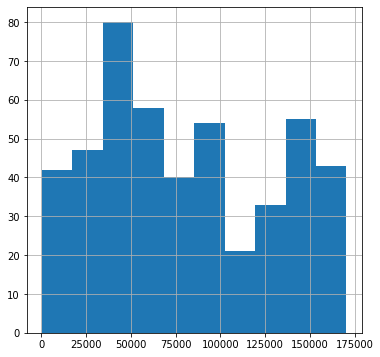

In [15]:
wn_carrier = df[df['Class'] == 1]
wn_carrier['Time'].hist(bins=10,figsize=[6,6])

In [16]:
X=df.drop("Class",axis=1)
y=df["Class"]

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [18]:
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [19]:
model = RandomForestClassifier(min_samples_leaf=5 ,random_state=123)
model.fit(X_train, y_train)
print('Validation set F1-Score: ', 
      f1_score(y_test, model.predict(X_test)))

Validation set F1-Score:  0.8447653429602888


In [20]:
type(X_train)

pandas.core.frame.DataFrame

In [21]:
from collections import Counter
ada = ADASYN(random_state=42)
X_ada, y_ada = ada.fit_resample(X_train, y_train)
print('Resampled dataset after ADASYN shape %s' % Counter(y_ada))

Resampled dataset after ADASYN shape Counter({1: 189837, 0: 189775})


In [22]:
ada_model = RandomForestClassifier(min_samples_leaf=5,
                                   random_state=123)
ada_model.fit(X_ada, y_ada)
print('Validation set f1 score: ', 
      f1_score(y_test, ada_model.predict(X_test)))

Validation set f1 score:  0.862876254180602


In [23]:
enn = EditedNearestNeighbours()
X_enn, y_enn = enn.fit_resample(X_train, y_train)
print('Resampled dataset after ENN shape %s' % Counter(y_enn))

Resampled dataset after ENN shape Counter({0: 189457, 1: 321})


In [24]:
enn_model = RandomForestClassifier(min_samples_leaf=5,
                                   random_state=123)
enn_model.fit(X_enn, y_enn)
print('Validation set f1 score: ', 
      f1_score(y_test, enn_model.predict(X_test)))

Validation set f1 score:  0.8394160583941606


In [25]:
from imblearn.over_sampling import SMOTE

X_resampled, y_resampled = SMOTE().fit_sample(X_train, y_train)
print('Resampled dataset after ADASYN shape %s' % Counter(y_resampled))

Resampled dataset after ADASYN shape Counter({0: 189775, 1: 189775})


In [26]:
smote_model = RandomForestClassifier(min_samples_leaf=5,
                                   random_state=123)
smote_model.fit(X_resampled, y_resampled)
print('Validation set Recall: ', 
      f1_score(y_test, smote_model.predict(X_test)))

Validation set Recall:  0.862876254180602


In [27]:
from imblearn.under_sampling import NearMiss 
nr = NearMiss() 
  
X_train_miss, y_train_miss = nr.fit_sample(X_train, y_train) 

In [28]:
near_model = RandomForestClassifier(min_samples_leaf=5,
                                   random_state=123)
near_model.fit(X_train_miss, y_train_miss)
print('Validation set f1 score: ', 
      f1_score(y_test, near_model.predict(X_test)))

Validation set f1 score:  0.017460981881241407


In [29]:
Xada=X_ada.values

In [30]:
Xada.shape

(379612, 30)

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [32]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=30,activation='relu'))

model.add(Dense(units=15,activation='relu'))


model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
model.fit(x=Xada, 
          y=y_ada, 
          epochs=200,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/200
11863/11863 [==============================] - 10s 850us/step - loss: 18.6242 - val_loss: 0.2546
Epoch 2/200
11863/11863 [==============================] - 10s 869us/step - loss: 3.3433 - val_loss: 4.5565
Epoch 3/200
11863/11863 [==============================] - 11s 906us/step - loss: 0.8953 - val_loss: 0.3042
Epoch 4/200
11863/11863 [==============================] - 10s 848us/step - loss: 0.2009 - val_loss: 0.1141
Epoch 5/200
11863/11863 [==============================] - 10s 871us/step - loss: 0.1456 - val_loss: 0.0569
Epoch 6/200
11863/11863 [==============================] - 11s 891us/step - loss: 0.1315 - val_loss: 0.1049
Epoch 7/200
11863/11863 [==============================] - 11s 933us/step - loss: 0.1243 - val_loss: 0.0380
Epoch 8/200
11863/11863 [==============================] - 11s 962us/step - loss: 0.1203 - val_loss: 0.1002
Epoch 9/200
11863/11863 [==============================] - 11s 915us/step - loss: 0.1183 - val_loss: 0.0458
Epoch 10/200
11863/11863 [=

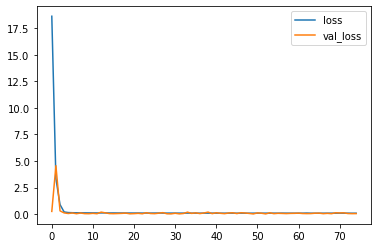

In [35]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [36]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [37]:
model.fit(x=Xada, 
          y=y_ada, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
11863/11863 [==============================] - 12s 1ms/step - loss: 113.3704 - val_loss: 0.6956
Epoch 2/600
11863/11863 [==============================] - 12s 999us/step - loss: 0.6942 - val_loss: 0.6907
Epoch 3/600
11863/11863 [==============================] - 11s 965us/step - loss: 0.6939 - val_loss: 0.6890
Epoch 4/600
11863/11863 [==============================] - 14s 1ms/step - loss: 0.6933 - val_loss: 0.7047
Epoch 5/600
11863/11863 [==============================] - 13s 1ms/step - loss: 0.6932 - val_loss: 0.6943
Epoch 6/600
11863/11863 [==============================] - 15s 1ms/step - loss: 0.6934 - val_loss: 0.7003
Epoch 7/600
11863/11863 [==============================] - 16s 1ms/step - loss: 0.6939 - val_loss: 0.6854
Epoch 8/600
11863/11863 [==============================] - 13s 1ms/step - loss: 0.6932 - val_loss: 0.7056
Epoch 9/600
11863/11863 [==============================] - 13s 1ms/step - loss: 0.6941 - val_loss: 0.6949
Epoch 10/600
11863/11863 [==============

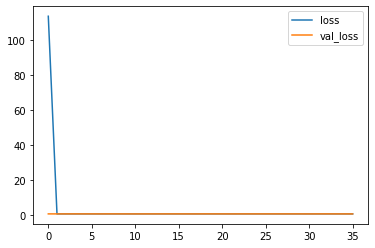

In [38]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [39]:
predictions = model.predict_classes(X_test)
from sklearn.metrics import classification_report,confusion_matrix

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [40]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93478
           1       0.00      0.00      0.00       152

    accuracy                           1.00     93630
   macro avg       0.50      0.50      0.50     93630
weighted avg       1.00      1.00      1.00     93630



C:\Users\91987\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
print(confusion_matrix(y_test,predictions))

[[93478     0]
 [  152     0]]


In [3]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [5]:
e=0.001
df['Log Ammount'] = np.log(df.pop('Amount')+e)

In [6]:
train_df, test_df = train_test_split(df, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)

In [7]:
train_labels = np.array(train_df.pop('Class'))
bool_train_labels = train_labels != 0
val_labels = np.array(val_df.pop('Class'))
test_labels = np.array(test_df.pop('Class'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [8]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


In [9]:
import keras.backend as K

In [10]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [11]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      f1_m
]

def make_model(metrics = METRICS, output_bias=None):
    if output_bias is not None:
        output_bias = tf.keras.initializers.Constant(output_bias)
    model = keras.Sequential([
      keras.layers.Dense(
          16, activation='relu',
          input_shape=(train_features.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

    model.compile(
      optimizer=keras.optimizers.Adam(lr=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

    return model

In [12]:
EPOCHS = 100
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [13]:
model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                496       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.predict(train_features[:10])

array([[0.7350707 ],
       [0.51198626],
       [0.6418377 ],
       [0.6767266 ],
       [0.6966052 ],
       [0.72036636],
       [0.5024197 ],
       [0.6747844 ],
       [0.6787157 ],
       [0.6849092 ]], dtype=float32)

In [15]:
neg, pos = np.bincount(df['Class'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 284807
    Positive: 492 (0.17% of total)



In [16]:
initial_bias = np.log([pos/neg])
initial_bias

array([-6.35935934])

In [17]:
model = make_model(output_bias = initial_bias)
model.predict(train_features[:10])

array([[3.6954880e-04],
       [2.9765368e-03],
       [9.9074841e-04],
       [3.7810206e-04],
       [7.5581670e-04],
       [5.0947070e-04],
       [9.2306262e-05],
       [1.3579726e-03],
       [2.8878450e-04],
       [1.1421740e-03]], dtype=float32)

In [18]:
initial_weights = os.path.join(tempfile.mkdtemp(),'initial_weights')
model.save_weights(initial_weights)

model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [20]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [21]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [22]:
def plot_loss(history, label, n):
  # Use a log scale to show the wide range of values.
  plt.semilogy(history.epoch,  history.history['loss'],color=colors[n], label='Train '+label)
  plt.semilogy(history.epoch,  history.history['val_loss'],
          color=colors[n], label='Val '+label,
          linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  
  plt.legend()

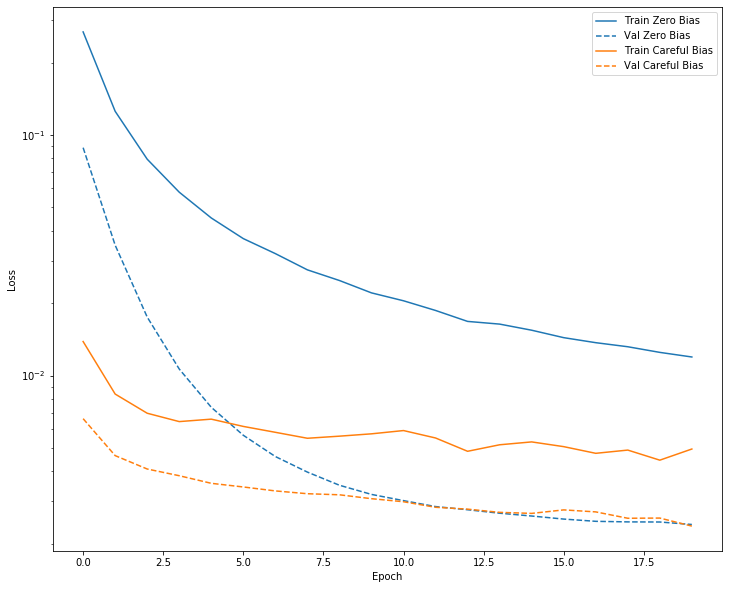

In [23]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

In [25]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels))

Epoch 1/100
90/90 [==============================] - 1s 11ms/step - loss: 0.0140 - tp: 87.0000 - fp: 39.0000 - tn: 227411.0000 - fn: 308.0000 - accuracy: 0.9985 - precision: 0.6905 - recall: 0.2203 - auc: 0.7149 - f1_m: 0.1166 - val_loss: 0.0071 - val_tp: 7.0000 - val_fp: 9.0000 - val_tn: 45487.0000 - val_fn: 66.0000 - val_accuracy: 0.9984 - val_precision: 0.4375 - val_recall: 0.0959 - val_auc: 0.8762 - val_f1_m: 0.1290
Epoch 2/100
90/90 [==============================] - 0s 6ms/step - loss: 0.0085 - tp: 90.0000 - fp: 22.0000 - tn: 181932.0000 - fn: 232.0000 - accuracy: 0.9986 - precision: 0.8036 - recall: 0.2795 - auc: 0.8152 - f1_m: 0.3250 - val_loss: 0.0048 - val_tp: 30.0000 - val_fp: 12.0000 - val_tn: 45484.0000 - val_fn: 43.0000 - val_accuracy: 0.9988 - val_precision: 0.7143 - val_recall: 0.4110 - val_auc: 0.9312 - val_f1_m: 0.4508
Epoch 3/100
90/90 [==============================] - 0s 5ms/step - loss: 0.0070 - tp: 133.0000 - fp: 25.0000 - tn: 181929.0000 - fn: 189.0000 - accurac

90/90 [==============================] - 1s 7ms/step - loss: 0.0049 - tp: 164.0000 - fp: 27.0000 - tn: 181927.0000 - fn: 158.0000 - accuracy: 0.9990 - precision: 0.8586 - recall: 0.5093 - auc: 0.8931 - f1_m: 0.5815 - val_loss: 0.0025 - val_tp: 62.0000 - val_fp: 13.0000 - val_tn: 45483.0000 - val_fn: 11.0000 - val_accuracy: 0.9995 - val_precision: 0.8267 - val_recall: 0.8493 - val_auc: 0.9518 - val_f1_m: 0.7497
Epoch 21/100
90/90 [==============================] - 1s 7ms/step - loss: 0.0043 - tp: 183.0000 - fp: 25.0000 - tn: 181929.0000 - fn: 139.0000 - accuracy: 0.9991 - precision: 0.8798 - recall: 0.5683 - auc: 0.9136 - f1_m: 0.6398 - val_loss: 0.0024 - val_tp: 62.0000 - val_fp: 13.0000 - val_tn: 45483.0000 - val_fn: 11.0000 - val_accuracy: 0.9995 - val_precision: 0.8267 - val_recall: 0.8493 - val_auc: 0.9587 - val_f1_m: 0.7497
Epoch 22/100
90/90 [==============================] - 1s 7ms/step - loss: 0.0045 - tp: 181.0000 - fp: 25.0000 - tn: 181929.0000 - fn: 141.0000 - accuracy: 0.99

90/90 [==============================] - 1s 8ms/step - loss: 0.0042 - tp: 192.0000 - fp: 26.0000 - tn: 181928.0000 - fn: 130.0000 - accuracy: 0.9991 - precision: 0.8807 - recall: 0.5963 - auc: 0.9137 - f1_m: 0.6160 - val_loss: 0.0022 - val_tp: 58.0000 - val_fp: 10.0000 - val_tn: 45486.0000 - val_fn: 15.0000 - val_accuracy: 0.9995 - val_precision: 0.8529 - val_recall: 0.7945 - val_auc: 0.9587 - val_f1_m: 0.7183
Epoch 40/100
90/90 [==============================] - 1s 8ms/step - loss: 0.0043 - tp: 178.0000 - fp: 23.0000 - tn: 181931.0000 - fn: 144.0000 - accuracy: 0.9991 - precision: 0.8856 - recall: 0.5528 - auc: 0.9044 - f1_m: 0.5958 - val_loss: 0.0022 - val_tp: 58.0000 - val_fp: 10.0000 - val_tn: 45486.0000 - val_fn: 15.0000 - val_accuracy: 0.9995 - val_precision: 0.8529 - val_recall: 0.7945 - val_auc: 0.9655 - val_f1_m: 0.7183
Epoch 41/100
90/90 [==============================] - 1s 6ms/step - loss: 0.0040 - tp: 194.0000 - fp: 26.0000 - tn: 181928.0000 - fn: 128.0000 - accuracy: 0.99

Epoch 00057: early stopping


No handles with labels found to put in legend.


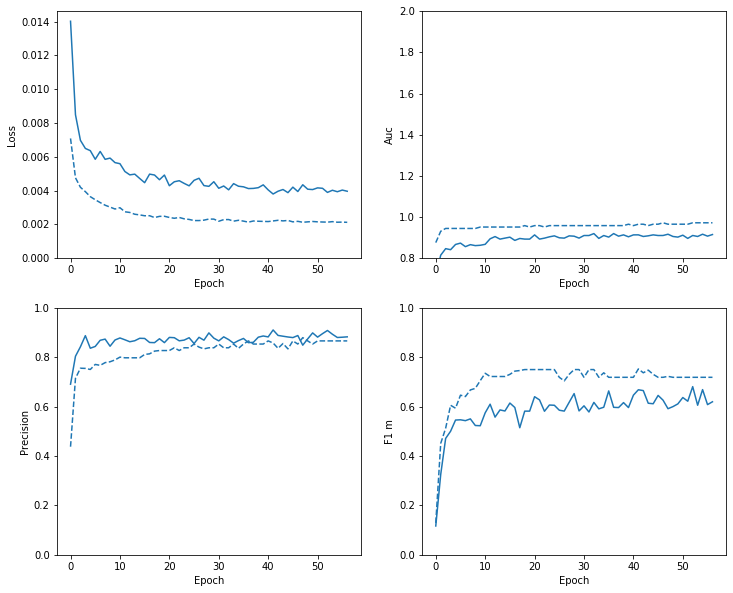

In [26]:
def plot_metrics(history):
    metrics =  ['loss', 'auc', 'precision', 'f1_m']
    for n, metric in enumerate(metrics):
        name = metric.replace("_"," ").capitalize()
        plt.subplot(2,2,n+1)
        plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
        plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
        plt.xlabel('Epoch')
        plt.ylabel(name)
        if metric == 'loss':
            plt.ylim([0, plt.ylim()[1]])
        elif metric == 'auc':
            plt.ylim([0.8,2])
        else:
            plt.ylim([0,1])

plt.legend()
plot_metrics(baseline_history)


In [27]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)

In [28]:
def plot_cm(labels, predictions, p=0.5):
    cm = confusion_matrix(labels, predictions > p)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(p))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

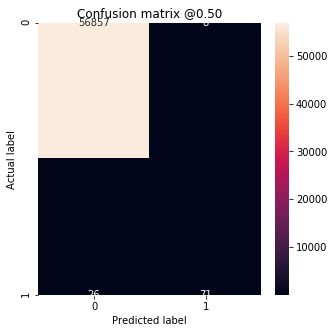

In [29]:
plot_cm(test_labels, test_predictions_baseline)

In [30]:
def plot_roc(name, labels, predictions, **kwargs):
    fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

    plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
    plt.xlabel('False positives [%]')
    plt.ylabel('True positives [%]')
    plt.xlim([-0.5,20])
    plt.ylim([80,100.5])
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')

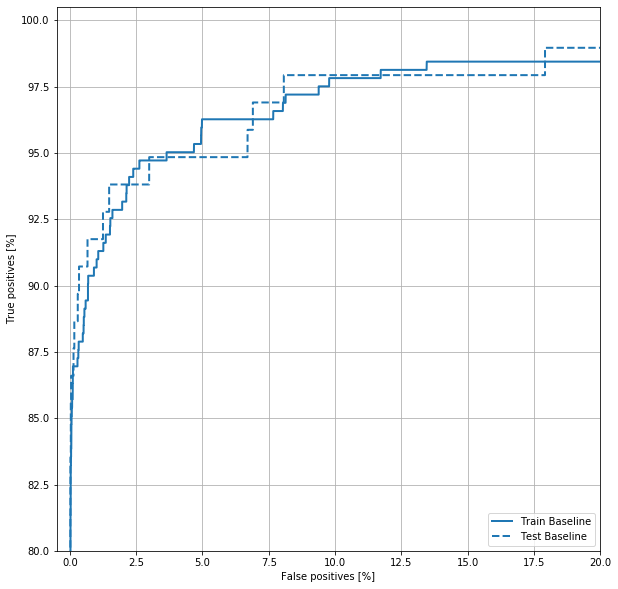

In [31]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

In [32]:
weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.50
Weight for class 1: 289.44


In [33]:
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks = [early_stopping],
    validation_data=(val_features, val_labels),
    # The class weights go here
    class_weight=class_weight) 

Epoch 1/100
90/90 [==============================] - 1s 15ms/step - loss: 3.5103 - tp: 86.0000 - fp: 61.0000 - tn: 227389.0000 - fn: 309.0000 - accuracy: 0.9984 - precision: 0.5850 - recall: 0.2177 - auc: 0.7123 - f1_m: 0.0983 - val_loss: 0.0063 - val_tp: 17.0000 - val_fp: 10.0000 - val_tn: 45486.0000 - val_fn: 56.0000 - val_accuracy: 0.9986 - val_precision: 0.6296 - val_recall: 0.2329 - val_auc: 0.9224 - val_f1_m: 0.2768
Epoch 2/100
90/90 [==============================] - 1s 7ms/step - loss: 1.5065 - tp: 128.0000 - fp: 179.0000 - tn: 181775.0000 - fn: 194.0000 - accuracy: 0.9980 - precision: 0.4169 - recall: 0.3975 - auc: 0.8411 - f1_m: 0.3751 - val_loss: 0.0056 - val_tp: 47.0000 - val_fp: 13.0000 - val_tn: 45483.0000 - val_fn: 26.0000 - val_accuracy: 0.9991 - val_precision: 0.7833 - val_recall: 0.6438 - val_auc: 0.9491 - val_f1_m: 0.6362
Epoch 3/100
90/90 [==============================] - 1s 8ms/step - loss: 1.1773 - tp: 171.0000 - fp: 365.0000 - tn: 181589.0000 - fn: 151.0000 - ac

90/90 [==============================] - 1s 6ms/step - loss: 0.5359 - tp: 258.0000 - fp: 8125.0000 - tn: 173829.0000 - fn: 64.0000 - accuracy: 0.9551 - precision: 0.0308 - recall: 0.8012 - auc: 0.8904 - f1_m: 0.0578 - val_loss: 0.0783 - val_tp: 70.0000 - val_fp: 885.0000 - val_tn: 44611.0000 - val_fn: 3.0000 - val_accuracy: 0.9805 - val_precision: 0.0733 - val_recall: 0.9589 - val_auc: 0.9895 - val_f1_m: 0.1369
Epoch 21/100
90/90 [==============================] - 1s 7ms/step - loss: 0.4274 - tp: 269.0000 - fp: 8198.0000 - tn: 173756.0000 - fn: 53.0000 - accuracy: 0.9547 - precision: 0.0318 - recall: 0.8354 - auc: 0.9175 - f1_m: 0.0601 - val_loss: 0.0779 - val_tp: 70.0000 - val_fp: 880.0000 - val_tn: 44616.0000 - val_fn: 3.0000 - val_accuracy: 0.9806 - val_precision: 0.0737 - val_recall: 0.9589 - val_auc: 0.9896 - val_f1_m: 0.1373
Epoch 22/100
90/90 [==============================] - 1s 6ms/step - loss: 0.4416 - tp: 266.0000 - fp: 8130.0000 - tn: 173824.0000 - fn: 56.0000 - accuracy: 0

90/90 [==============================] - 1s 8ms/step - loss: 0.4407 - tp: 268.0000 - fp: 7477.0000 - tn: 174477.0000 - fn: 54.0000 - accuracy: 0.9587 - precision: 0.0346 - recall: 0.8323 - auc: 0.9086 - f1_m: 0.0651 - val_loss: 0.0719 - val_tp: 70.0000 - val_fp: 758.0000 - val_tn: 44738.0000 - val_fn: 3.0000 - val_accuracy: 0.9833 - val_precision: 0.0845 - val_recall: 0.9589 - val_auc: 0.9936 - val_f1_m: 0.1542
Epoch 40/100
90/90 [==============================] - 1s 8ms/step - loss: 0.4495 - tp: 268.0000 - fp: 7311.0000 - tn: 174643.0000 - fn: 54.0000 - accuracy: 0.9596 - precision: 0.0354 - recall: 0.8323 - auc: 0.9063 - f1_m: 0.0667 - val_loss: 0.0707 - val_tp: 70.0000 - val_fp: 732.0000 - val_tn: 44764.0000 - val_fn: 3.0000 - val_accuracy: 0.9839 - val_precision: 0.0873 - val_recall: 0.9589 - val_auc: 0.9938 - val_f1_m: 0.1605
Epoch 41/100
90/90 [==============================] - 1s 7ms/step - loss: 0.3481 - tp: 273.0000 - fp: 7224.0000 - tn: 174730.0000 - fn: 49.0000 - accuracy: 0

90/90 [==============================] - 1s 7ms/step - loss: 0.3239 - tp: 277.0000 - fp: 6434.0000 - tn: 175520.0000 - fn: 45.0000 - accuracy: 0.9645 - precision: 0.0413 - recall: 0.8602 - auc: 0.9501 - f1_m: 0.0872 - val_loss: 0.0642 - val_tp: 70.0000 - val_fp: 579.0000 - val_tn: 44917.0000 - val_fn: 3.0000 - val_accuracy: 0.9872 - val_precision: 0.1079 - val_recall: 0.9589 - val_auc: 0.9960 - val_f1_m: 0.1924
Epoch 59/100
90/90 [==============================] - 1s 7ms/step - loss: 0.2567 - tp: 286.0000 - fp: 6664.0000 - tn: 175290.0000 - fn: 36.0000 - accuracy: 0.9632 - precision: 0.0412 - recall: 0.8882 - auc: 0.9625 - f1_m: 0.0775 - val_loss: 0.0683 - val_tp: 70.0000 - val_fp: 639.0000 - val_tn: 44857.0000 - val_fn: 3.0000 - val_accuracy: 0.9859 - val_precision: 0.0987 - val_recall: 0.9589 - val_auc: 0.9960 - val_f1_m: 0.1800
Epoch 60/100
90/90 [==============================] - 1s 6ms/step - loss: 0.3079 - tp: 277.0000 - fp: 6557.0000 - tn: 175397.0000 - fn: 45.0000 - accuracy: 0

90/90 [==============================] - 1s 6ms/step - loss: 0.3183 - tp: 274.0000 - fp: 5850.0000 - tn: 176104.0000 - fn: 48.0000 - accuracy: 0.9676 - precision: 0.0447 - recall: 0.8509 - auc: 0.9524 - f1_m: 0.0830 - val_loss: 0.0619 - val_tp: 70.0000 - val_fp: 538.0000 - val_tn: 44958.0000 - val_fn: 3.0000 - val_accuracy: 0.9881 - val_precision: 0.1151 - val_recall: 0.9589 - val_auc: 0.9966 - val_f1_m: 0.2031
Epoch 78/100
90/90 [==============================] - 1s 6ms/step - loss: 0.2798 - tp: 277.0000 - fp: 5809.0000 - tn: 176145.0000 - fn: 45.0000 - accuracy: 0.9679 - precision: 0.0455 - recall: 0.8602 - auc: 0.9598 - f1_m: 0.0843 - val_loss: 0.0613 - val_tp: 70.0000 - val_fp: 529.0000 - val_tn: 44967.0000 - val_fn: 3.0000 - val_accuracy: 0.9883 - val_precision: 0.1169 - val_recall: 0.9589 - val_auc: 0.9966 - val_f1_m: 0.2060
Epoch 79/100
90/90 [==============================] - 1s 6ms/step - loss: 0.3543 - tp: 266.0000 - fp: 5714.0000 - tn: 176240.0000 - fn: 56.0000 - accuracy: 0

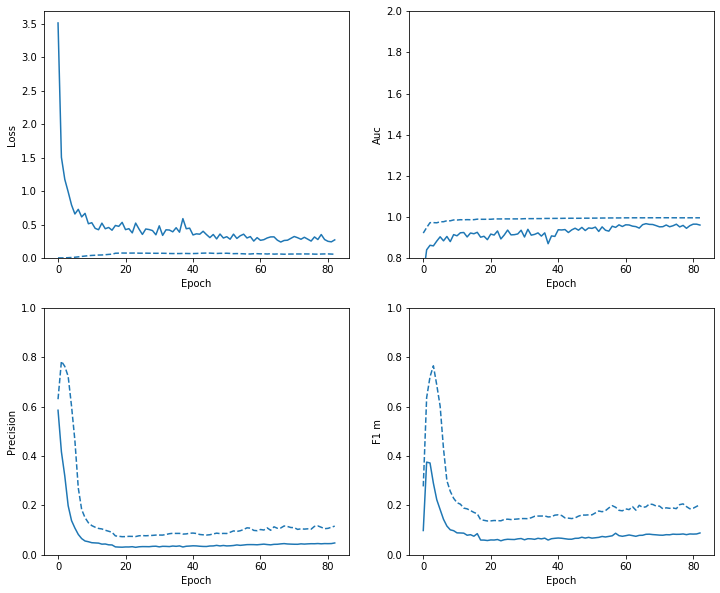

In [34]:
plot_metrics(weighted_history)

In [35]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)

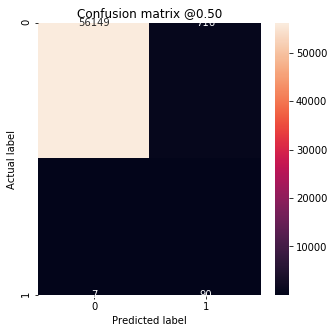

In [36]:
plot_cm(test_labels, test_predictions_weighted)

In [38]:
train_predictions_weighted = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = model.predict(test_features, batch_size=BATCH_SIZE)

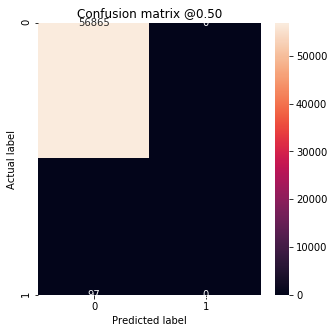

In [39]:
plot_cm(test_labels, test_predictions_weighted)